In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from numpy import log,dot,e,shape

In [88]:
df=pd.read_csv('classification.csv')

In [89]:
df

,Exam Score2,Pass
0,43.42,0
1,64.49,0
2,52.69,1
3,24.99,0
4,45.93,0
5,12.89,0
6,80.38,0
7,61.49,1
8,67.92,1


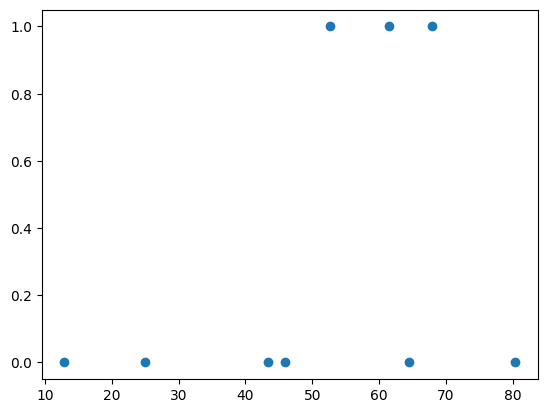

In [90]:
plt.scatter(x='Exam Score2',y='Pass',data=df)

In [91]:
x=df[['Exam Score2']].values
y=df['Pass'].values

# initializing parameters

In [92]:
def initialize_para(n_features):
    weights=np.random.rand(n_features)
    bias=np.random.rand()
    return weights,bias

In [93]:
n_features=x.shape[1]

In [94]:
weights,bias=initialize_para(n_features)
print(weights)
print(bias)

[0.82851782]
0.442383267119128


# sigmoid function

In [133]:
def sigmoid(z):
   return 1/ (1+np.exp(-z))

In [134]:
z=np.dot(x,weights)+bias
sigmoid_values=sigmoid(z)
print('sigmoid_values')
sigmoid_values


sigmoid_values


array([0.06018344, 0.4863238 , 0.17318518, 0.00603359, 0.08110618,
       0.00129078, 0.87832297, 0.39216146, 0.59478194])

# cost function

In [135]:
def cost_func(y,y_pred):
    m=len(y)
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    cost= -1 * (1/m)* np.sum (y * np.log(y_pred) + (1-y)* np.log(1 - y_pred))
    return cost

In [136]:
cost= cost_func(y,sigmoid_values)
cost

0.681731326114688

# gradient descent

In [130]:
def gradient_des(x, y, weights, bias, learning_rate, n_iterations):
    m = len(y)

    for i in range(n_iterations):
        z = np.dot(x, weights) + bias
        y_pred = sigmoid(z)

        dw = (1/m) * np.dot(x.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            cost = cost_func(y, y_pred)
            print('cost', cost)
    
    return weights, bias

learning_rate = 0.00001
n_iterations = 100000

weights, bias = gradient_des(x, y, weights, bias, learning_rate, n_iterations)
print('optimized weight', weights)
print('optimized bias', bias)


cost 3.0191711238063905
cost 2.610140485870618
cost 2.2022458334403026
cost 1.798677221444284
cost 1.4116687110264237
cost 1.079222204211078
cost 0.8590309417586661
cost 0.7522719116050026
cost 0.7091096421346972
cost 0.6927493670417646
cost 0.6866531484144434
cost 0.6843857331779138
cost 0.6835403226318145
cost 0.6832238761501171
cost 0.6831046950552039
cost 0.6830592361496038
cost 0.6830413704712578
cost 0.683033842949715
cost 0.6830301912488008
cost 0.6830279932011417
cost 0.6830263404961804
cost 0.6830248924130319
cost 0.6830235211178347
cost 0.6830221786434573
cost 0.6830208469899071
cost 0.6830195194022735
cost 0.683018193345558
cost 0.6830168678684061
cost 0.6830155426137833
cost 0.6830142174476966
cost 0.683012892319861
cost 0.6830115672114025
cost 0.6830102421152396
cost 0.6830089170287144
cost 0.6830075919508289
cost 0.6830062668812086
cost 0.6830049418197136
cost 0.6830036167662911
cost 0.6830022917209205
cost 0.6830009666835957
cost 0.682999641654313
cost 0.6829983166330715

# predictions

In [137]:
def predict(x,weights,bias):
    z=np.dot(x,weights)+bias
    y_pred=sigmoid(z)
    return[1 if i>0.5 else 0 for i in y_pred]

prediction=predict(x,weights,bias)
print("predictions")
prediction

predictions


[0, 0, 0, 0, 0, 0, 1, 0, 1]

# checking accuracy

In [140]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true== y_pred)/ len(y_true)
    return accuracy

model_accuracy = accuracy(y, prediction)
model_accuracy 

0.6666666666666666